<a href="https://colab.research.google.com/github/Moses-Otu/DataEngineering/blob/main/ML_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Create Sample Dataset**

In [ ]:
import pandas as pd
import numpy as np

# Random seed for reproducibility
np.random.seed(42)

# Sample data generation for 200 graduate trainees
n = 200
data = {
    'GPA': np.round(np.random.uniform(2.0, 4.0, size=n), 2),
    'Entry Test Score': np.random.randint(50, 100, size=n),
    'Work Experience': np.random.randint(0, 3, size=n),
    'Internship Experience': np.random.choice([0, 1], size=n),
    'Extracurricular Participation': np.random.randint(0, 10, size=n),
    'Training Attendance': np.random.randint(70, 100, size=n)
}

# Appraisal Score: Create a target variable with some randomness
data['Appraisal Score'] = (0.4 * data['GPA'] +
                           0.3 * data['Entry Test Score'] +
                           0.2 * data['Training Attendance'] +
                           0.1 * data['Work Experience'] +
                           np.random.normal(0, 5, size=n)).astype(int)

# Ensure "Appraisal Score" is between 40 and 100
data['Appraisal Score'] = np.clip(data['Appraisal Score'], 40, 100)

# Create a DataFrame
df = pd.DataFrame(data)

# Show the first few rows
print(df.head())



    GPA  Entry Test Score  Work Experience  Internship Experience  \
0  2.75                73                1                      0   
1  3.90                60                1                      0   
2  3.46                98                0                      0   
3  3.20                57                2                      1   
4  2.31                85                0                      1   

   Extracurricular Participation  Training Attendance  Appraisal Score  
0                              6                   80               40  
1                              9                   78               40  
2                              2                   74               40  
3                              0                   83               40  
4                              4                   97               42  


In [ ]:
df.head()

,GPA,Entry Test Score,Work Experience,Internship Experience,Extracurricular Participation,Training Attendance,Appraisal Score
0,2.75,73,1,0,6,80,40
1,3.90,60,1,0,9,78,40
2,3.46,98,0,0,2,74,40
3,3.20,57,2,1,0,83,40
4,2.31,85,0,1,4,97,42


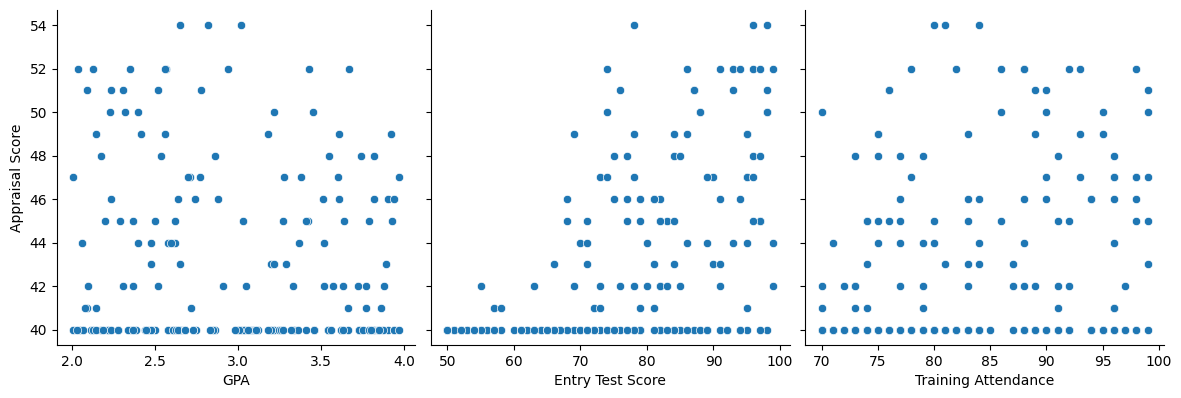

In [ ]:
sns.pairplot(df, x_vars=[ 'GPA', 'Entry Test Score','Training Attendance'], y_vars='Appraisal Score', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
# Features and target variable
X = df[['GPA', 'Entry Test Score', 'Work Experience', 'Internship Experience', 'Extracurricular Participation', 'Training Attendance']]
y = df['Appraisal Score']

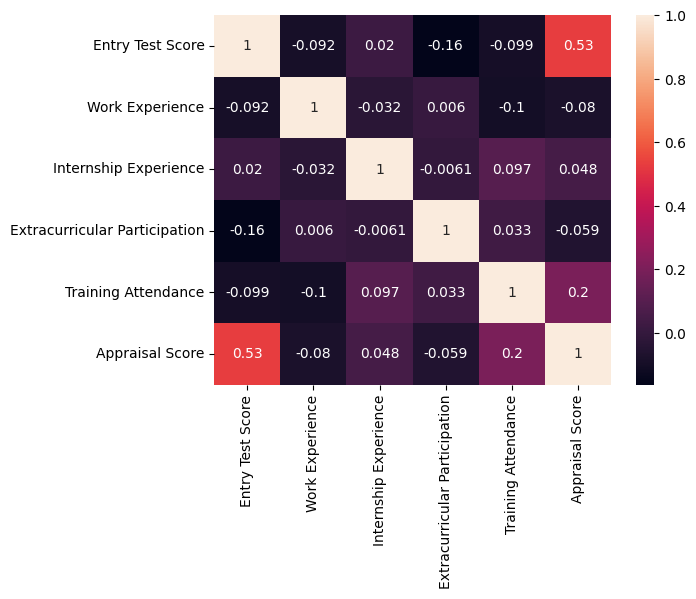

In [ ]:
sns.heatmap(df.iloc[:,1:].corr(), annot = True)
plt.show()

Dealing with missing data: using averages.

**Data Encoding**

In [ ]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')
#x = np.array(ct.fit_transform(x))

**Splitting the dataset into the Training and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x_train,x_test,y_train,y_test= train_test_split(x, y,test_size=0.2,random_state=42)

In [ ]:
mlr= LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

25.131692354953273


[(array([ 2.75, 73.  ,  1.  ,  0.  ,  6.  , 80.  ]), -1.2364939566934328),
 (array([ 3.9, 60. ,  1. ,  0. ,  9. , 78. ]), 0.1459839621281038),
 (array([ 3.46, 98.  ,  0.  ,  0.  ,  2.  , 74.  ]), 0.006649093088780689),
 (array([ 3.2, 57. ,  2. ,  1. ,  0. , 83. ]), 0.5034648632556442),
 (array([ 2.31, 85.  ,  0.  ,  1.  ,  4.  , 97.  ]), 0.10533244499343669),
 (array([ 2.31, 87.  ,  1.  ,  0.  ,  3.  , 99.  ]), 0.1154702674320248)]

In [ ]:

#Predicting the Test and Train set result
y_pred_mlr= mlr.predict(x_test)
x_pred_mlr= mlr.predict(x_train)

In [ ]:
print(y_test)

95     40
15     40
30     40
158    43
128    40
115    48
69     47
170    40
174    43
45     42
66     40
182    40
165    52
78     41
186    40
177    47
56     40
152    45
82     40
68     40
124    40
16     40
148    42
93     40
65     40
60     51
84     44
67     47
125    40
132    40
9      45
18     48
55     40
75     40
150    46
104    48
135    54
137    40
164    48
76     40
Name: Appraisal Score, dtype: int64


In [ ]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [43.18 45.03 40.66 45.75 42.09 42.5  42.91 39.39 42.7  43.74 43.29 40.58
 44.   44.09 41.13 44.02 42.95 46.66 42.23 44.18 42.39 42.97 42.53 41.17
 41.65 44.05 43.9  45.87 40.59 45.3  45.07 43.7  40.02 41.14 44.47 43.
 46.04 39.08 44.73 41.05]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
95,40,43.176851
15,40,45.032319
30,40,40.662678
158,43,45.753222
128,40,42.094484
115,48,42.500906
69,47,42.912778
170,40,39.392295
174,43,42.699812
45,42,43.735087


In [ ]:
#Predict for any value
mlr.predict([[5.0, 100, 3, 1, 10, 100]])

array([46.67])

In [ ]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 34.54


In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 2.6016244100555435
Mean Square Error: 11.176596613375994
Root Mean Square Error: 3.3431417279822275
